# Qu’est ce que le clustering

Le clustering est une méthode d’apprentissage non supervisé (unsupervised learning). Ainsi, on n’essaie pas d’apprendre une relation de corrélation entre un ensemble de features X d’une observation et une valeur à prédire Y, comme c’est le cas pour l’apprentissage supervisé. L’apprentissage non supervisé va plutôt trouver des patterns dans les données. Notamment, en regroupant les choses qui se ressemblent.

## Qu’est ce que K-means

K-means est un algorithme non supervisé de clustering non hiérarchique. Il permet de regrouper en K clusters distincts les observations du data set. Ainsi les données similaires se retrouveront  dans un même cluster. Par ailleurs, une observation ne peut se retrouver que dans un cluster à la fois (exclusivité d’appartenance). Une même observation, ne pourra donc, appartenir à deux clusters différents.

## Notion de similarité
Pour pouvoir regrouper un jeu de données en K cluster distincts, l’algorithme K-Means a besoin d’un moyen de comparer le degré de similarité entre les différentes observations. Ainsi, deux données qui se ressemblent, auront une distance de dissimilarité réduite, alors que deux objets différents auront une distance de séparation plus grande.

Les littératures mathématiques et statistiques regorgent de définitions de distance, les plus connues pour les cas de  clustering sont :

* La distance Euclidienne : C’est la distance géométrique qu’on apprend au collège. Soit une matrice X à n variables quantitatives. Dans l’espace vectoriel E^n. La distance euclidienne d entre deux observations x_1 et x_2 se calcule comme suit :

d(x_1, x_2) = \sqrt{\sum_{j=1}^{n} (x_1_n - x_2_n)^2}

* La distance de Manhattan (taxi-distance) : est la distance entre deux points parcourue par un taxi lorsqu’il se déplace dans une ville où les rues sont agencées selon un réseau ou un quadrillage. 

# Algorithme K-means

Entrée : 

K le nombre de cluster à former

Le Training Set (matrice de données)

## DEBUT

Choisir aléatoirement K points (une ligne de la matrice de données). Ces points sont les centres des clusters (nommé centroïd).

                      ## REPETER

Affecter chaque point (élément de la matrice de donnée) au groupe dont il est le plus proche au son centre

Recalculer le centre de chaque cluster  et modifier le centroide

                     ##JUSQU‘A     CONVERGENCE

                               OU    (stabilisation de l’inertie totale de la population)

## FIN ALGORITHME

# Fonctionnement de l’algorithme K-Means


k-means est un algorithme itératif qui minimise la somme des distances entre chaque individu et le centroïd. Le choix initial des centroïdes conditionne le résultat final.
Admettant un nuage d’un ensemble de points, K-Means change les points de chaque cluster jusqu’à ce que la somme ne puisse plus diminuer. Le résultat est un ensemble de clusters compacts et clairement séparés, sous réserve de choisir la bonne valeur K  du nombre de clusters .

## Importation des librairies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

# Generez les donnees aleatoirement

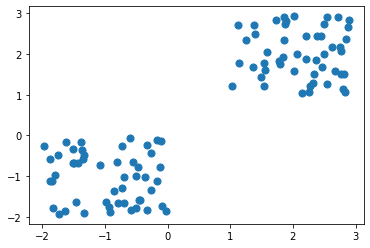

In [ ]:
X= -2 * np.random.rand(100,2) # generation de 100 points avec deux coordonnées.
X1 = 1 + 2 * np.random.rand(50,2)
X[50:100, :] = X1
plt.scatter(X[ : , 0], X[ :, 1], s = 50) # s la taille des points.
plt.show()

# Importer la classe depuis scikit-learn

In [ ]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=2)
Kmean.fit(X)

KMeans(n_clusters=2)

# coordonnes ces centroids

In [ ]:
Kmean.cluster_centers_

array([[-0.95281908, -1.03252244],
       [ 2.12029506,  2.00927717]])

## Affichez le centre des clusters

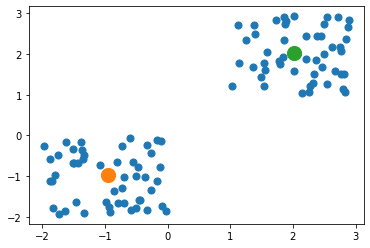

In [ ]:
plt.scatter(X[ : , 0], X[ : , 1], s =50)
plt.scatter(-0.94665068, -0.97138368, s=200)
plt.scatter(2.01559419, 2.02597093, s=200)
plt.show()

# Obtenir les labels du jeux de donnees

In [ ]:
Kmean.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

# Algorithme de test

In [ ]:
x_test=np.array([-3.0,-3.0])
print(x_test.shape)
x_test=x_test.reshape(1, -1)
print(x_test.shape)

Kmean.predict(x_test)

(2,)
(1, 2)


array([0], dtype=int32)

# Nombre de clusters K =3

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
features, true_labels = make_blobs( 
n_samples=200,
centers=3,
cluster_std=2.75,
random_state=42)

In [ ]:
features[:5]

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

In [ ]:
true_labels[:5]

array([1, 0, 2, 2, 2])

# Normaliser les donnees

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
 scaled_features[:5]

array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446]])

In [ ]:
kmeans = KMeans(
init="random",
n_clusters=3,
n_init=10,
max_iter=300,
random_state=42)

max_iter: sets the number of maximum iterations for each initialization of the k-means algorithm.

n_init: sets the number of initializations to perform. The default behavior for the scikit-learn algorithm is to perform ten k-means runs and return the results of the one with the lowest SSE

n_clusters: sets k for the clustering step

In [ ]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

Statistics from the initialization run with the lowest SSE are available as attributes of kmeans after calling .fit():

# Affichez valeur de SSE (sum of squared error)

In [ ]:
# The lowest SSE value
kmeans.inertia_

74.57960106819854

# Affichez le centre des clusters

In [ ]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[-0.25813925,  1.05589975],
       [-0.91941183, -1.18551732],
       [ 1.19539276,  0.13158148]])

# Nombre d'iteration

In [ ]:
# The number of iterations required to converge
kmeans.n_iter_

2

In [ ]:
kmeans.labels_[:5]

array([2, 0, 1, 1, 1], dtype=int32)

# Comment choisir la bonne valeur de K

In [ ]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 42,
}
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  sse.append(kmeans.inertia_)

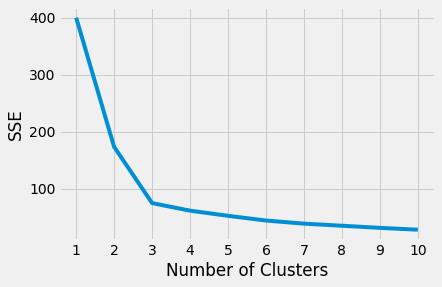

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

# le meilleur K est 3.

# FIN!!!

### Implementation de la classe Kmeans

In [ ]:
class kmeans:
  def __init__(self, k_number, max_iter):
    self.k_number = k_number
    self.max_iter = max_iter
    self.on = True

  # init cluster center
  def init_cluster_centers(self):
    self.k_list = np.array([np.random.rand(1, self.x.shape[1])[0] for i in range(self.k_number)]) # containing the clusters centers
    self.O_k_list = self.k_list.copy()
    self.K_members = [[] for i in range(self.k_number)] # contain indexs of all points belongs to a cluster
    return True  

  def minkowskiDis(self, x, lambq): # if lambq =1 : Manhattan, lambq =2 : Euclidienne,lambq =infi : Tchebychev
      distances = 0
      dist_matrix = np.zeros((self.k_number, self.x.shape[0]))
      dist_list = []
      for i in range(x.shape[0]): # pour chaque ligne de x
        for j in range(len(self.k_list)): # pour chaque centre de cluster
            X = np.power(np.abs(x[i,:] - self.k_list[j]), lambq)
            distances = np.sum(X)
            distances = pow(distances, (1/lambq))
            dist_list.append(distances)
            distances = 0
        dist_matrix[:,i] = dist_list.copy()
        dist_list = []
      return dist_matrix # retourne matrice de taille (self.k_list.shape[0], self.x.shape[0])
  
  def processing(self):
    self.iter = 1 
    while self.iter <= self.max_iter and self.on : 
      distances = self.minkowskiDis(self.x, 2)
      self.indices = np.argsort(distances, axis =0) # le tri s'effectu selon les colonnes. Pour chaque colonnes, il renvoit  l'indice du Cluster  auquel appartient le point (la ligne).
      self.indices = self.indices[0] 
      for j in range(len(self.indices)):
        self.K_members[self.indices[j]].append(j)
      self.cluster_centers_update() # mise à jour de la position du centre des Clusters
      self.stop()
      self.iter += 1 
    return True

  # training process
  def fit(self, x):
    self.x = x
    self.init_cluster_centers()
    self.processing()
    return True

  # calculate cluster center  
  def cluster_centers_update(self):
    for i in range(self.k_number):
      x_set = self.x[self.K_members[i],:]
      if x_set.shape[0] != 0:
        self.k_list[i] = np.average(x_set , axis=0) # affectation de la nouvelle valeur du centre du cluster 
    return True

  def stop(self):
    if np.all(self.O_k_list == self.k_list):
      self.on = False
    else :
      self.O_k_list = self.k_list.copy()
      self.K_members = [[] for i in range(self.k_number)] # reunitiation de la liste des appartenances
    return True

  def cluster_centers(self):
    return self.k_list
  
  def labels(self):
    return self.indices
    
  def maxIter(self):
    return self.iter

  def inertia(self):
    pass

In [ ]:
test = kmeans(2,100)
test.fit(X)
print(test.labels())
print(test.cluster_centers())
print(test.maxIter())

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[ 2.12029506  2.00927717]
 [-0.95281908 -1.03252244]]
3


In [ ]:
steve = kmeans(3,1000)
steve.fit(scaled_features)
print(steve.labels())
print(steve.cluster_centers())
print(steve.maxIter())

[2 0 1 1 1 1 0 1 2 1 2 2 2 2 0 1 0 1 2 1 2 2 1 0 1 0 0 1 0 2 2 2 1 1 0 0 1
 0 1 0 2 0 1 2 1 2 2 1 2 0 1 0 1 0 0 0 1 2 0 2 1 0 1 1 1 1 0 0 1 0 0 1 0 2
 2 2 2 0 2 0 0 2 1 1 1 1 1 0 2 1 2 0 0 0 2 1 0 2 2 0 1 1 0 1 0 2 1 2 2 1 2
 2 0 1 0 1 1 0 0 0 1 2 0 1 1 2 0 0 2 0 2 1 0 1 1 2 2 2 0 2 0 0 1 2 2 0 2 1
 1 2 0 1 2 1 2 1 1 0 2 2 0 2 2 1 0 2 2 0 1 2 1 0 2 1 0 2 0 0 0 2 0 2 1 1 1
 0 2 2 2 0 0 2 1 1 0 1 0 0 2 2]
[[-0.25813925  1.05589975]
 [-0.91941183 -1.18551732]
 [ 1.19539276  0.13158148]]
5
